This uses ChemCam cleaned, calibrated spectra from the PDS repository. The data is given in csv format with the first column being the wavelength and the following columns representing the intensities measured in units of photons per channels for each of the $n$ shots.

In [12]:
import pandas as pd
from pathlib import Path

In [13]:
data_path = Path("data/cl5_402372860ccs_f0043232ccam01055p3.csv")

with open(data_path) as f:
    # find index of last line starting with "#" and skip rows until then
    for i, line in enumerate(f):
        if not line.startswith("#"):
            break
        
    # read csv from that line - columns also start wih "#"
    data = pd.read_csv(data_path, skiprows=i-1)
    

# strip whitespace from column names
data.columns = data.columns.str.strip()
# remove # from column names
data.columns = data.columns.str.replace("# ", "")
# remove negative values in all columns that contains "shot"
data.loc[:, data.columns.str.contains("shot")] = data.loc[:, data.columns.str.contains("shot")].clip(lower=0)
# dropna
data.dropna(inplace=True)

In [14]:
data["Avg"] = data[[col for col in data.columns if "shot" in col]].mean(axis=1)
data.head()

,wave,shot1,shot2,shot3,shot4,shot5,shot6,shot7,shot8,shot9,...,shot24,shot25,shot26,shot27,shot28,shot29,shot30,median,mean,Avg
0,240.81100,8.770115e+11,1.132834e+12,1.258361e+12,1.196136e+12,1.376679e+12,1.305162e+12,1.541197e+12,1.437228e+12,1.648801e+12,...,1.567626e+12,1.644290e+12,1.626435e+12,1.513792e+12,1.515388e+12,1.576223e+12,1.438483e+12,1.511420e+12,1.515477e+12,1.470719e+12
1,240.86501,2.430895e+11,4.454448e+11,3.968631e+11,3.396665e+11,4.729439e+11,4.431092e+11,6.091308e+11,4.809605e+11,5.856851e+11,...,4.666354e+11,5.553979e+11,5.429526e+11,4.737187e+11,4.643347e+11,4.317674e+11,4.118230e+11,4.724238e+11,4.933605e+11,4.811553e+11
2,240.91800,1.276477e+11,3.210204e+11,2.084114e+11,2.277920e+11,4.161913e+11,3.226898e+11,4.247626e+11,3.034072e+11,4.876187e+11,...,3.341609e+11,3.919848e+11,3.044722e+11,3.266855e+11,2.938930e+11,3.318329e+11,2.185471e+11,3.430574e+11,3.413442e+11,3.345913e+11
3,240.97200,3.240955e+11,4.240377e+11,4.495747e+11,4.166590e+11,5.153406e+11,5.324661e+11,5.814939e+11,5.600821e+11,7.090352e+11,...,5.586973e+11,6.368067e+11,6.011125e+11,5.314584e+11,5.423587e+11,4.770882e+11,5.106273e+11,5.746654e+11,5.824672e+11,5.629439e+11
4,241.02699,1.053038e+12,1.309773e+12,1.403151e+12,1.432497e+12,1.541478e+12,1.528150e+12,1.750736e+12,1.624974e+12,1.792971e+12,...,1.775845e+12,1.851349e+12,1.836502e+12,1.732560e+12,1.730182e+12,1.674028e+12,1.622997e+12,1.715984e+12,1.722077e+12,1.664120e+12


In [15]:
# Remove values in the following masks
# The following wavelength ranges are known to have noise: they do not include major element diagnostic peaks.
masks = [
    (240.811, 246.635),
    (338.457, 340.797),
    (382.138, 387.859),
    (473.184, 492.427),
    (849, 905.574)
]

def mask_wavelegths(data: pd.DataFrame, mask):
    return data.loc[~((data["wave"] > mask[0]) & (data["wave"] < mask[1]))]

for mask in masks:
    data = mask_wavelegths(data, mask)

data.head()

,wave,shot1,shot2,shot3,shot4,shot5,shot6,shot7,shot8,shot9,...,shot24,shot25,shot26,shot27,shot28,shot29,shot30,median,mean,Avg
0,240.81100,8.770115e+11,1.132834e+12,1.258361e+12,1.196136e+12,1.376679e+12,1.305162e+12,1.541197e+12,1.437228e+12,1.648801e+12,...,1.567626e+12,1.644290e+12,1.626435e+12,1.513792e+12,1.515388e+12,1.576223e+12,1.438483e+12,1.511420e+12,1.515477e+12,1.470719e+12
110,246.68800,6.753406e+11,9.656003e+11,1.034841e+12,1.153973e+12,1.129522e+12,1.080646e+12,1.225929e+12,1.245396e+12,1.323607e+12,...,1.513378e+12,1.463987e+12,1.390034e+12,1.366174e+12,1.385651e+12,1.413973e+12,1.374290e+12,1.375285e+12,1.354057e+12,1.295747e+12
111,246.74100,7.001900e+11,9.807223e+11,1.094012e+12,1.209817e+12,1.179867e+12,1.138384e+12,1.244668e+12,1.254270e+12,1.354490e+12,...,1.535772e+12,1.518989e+12,1.453461e+12,1.383303e+12,1.426977e+12,1.433656e+12,1.415324e+12,1.407937e+12,1.393005e+12,1.331666e+12
112,246.79401,5.131859e+11,7.026187e+11,7.962139e+11,8.547460e+11,8.635960e+11,8.192426e+11,8.402288e+11,9.189944e+11,9.629640e+11,...,1.093478e+12,1.079602e+12,1.046228e+12,1.022489e+12,1.038540e+12,1.021839e+12,1.011245e+12,1.008451e+12,1.008319e+12,9.628821e+11
113,246.84700,2.845496e+11,3.551593e+11,3.800423e+11,4.855201e+11,4.455700e+11,4.242698e+11,4.694188e+11,4.922986e+11,5.279824e+11,...,5.738337e+11,5.659984e+11,5.765733e+11,5.402740e+11,5.453433e+11,6.113336e+11,5.486960e+11,5.398450e+11,5.360811e+11,5.162915e+11


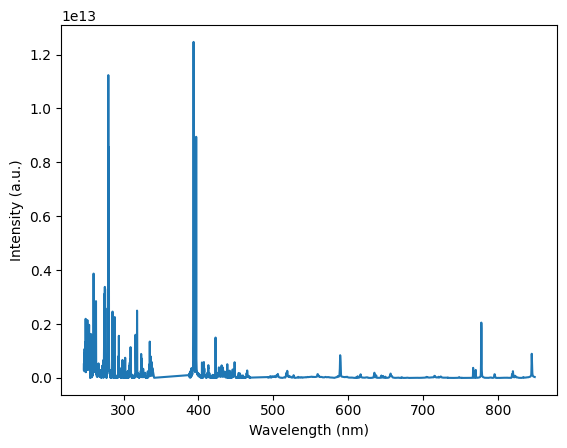

In [16]:
# plot avg. of all shots (y) over wavelength (x)
import matplotlib.pyplot as plt

# drop first row
data = data.iloc[1:]

shots = [col for col in data.columns if "shot" in col]
data_shots = data[shots]
# drop first 5 shots
data_shots = data_shots.iloc[5:]

plt.plot(data["wave"].iloc[5:], data["shot1"].iloc[5:], label="shot1")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (a.u.)") # a.u. = arbitrary units
plt.show()